Commercial_df_2021

In [31]:
from sktime.datasets import load_airline
from sktime.utils.plotting import plot_series
from sktime.split import temporal_train_test_split
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.performance_metrics.forecasting import mean_squared_error
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.fbprophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np
import os
import utils.KEprocessing
import matplotlib.pyplot as plt
import utils.KEprocessing
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
import pandas as pd
commercial_df_2021 = pd.read_csv('data/yearlyData/commercial_df_2021.csv', sep=',', index_col=0)

In [33]:
commercial_df_2021 

,DateTime,CUSTOMER,AREA,ISPRIVATEPERSON,Power_Consumption,One_Day_Power,One_Day_Power_NaN,Air Temperature 1 Min_P19,Air Temperature 2 Max_P27,Air Temperature 2 Min_P26,Dew Point Temperature_P39,Precipitation_P7,Relative Humidity_P6,Wind Speed_P4,Price
6944448,2021-01-01 00:00:00,1060753805,Kvarnholmen,Nej,0.001000,0.023940,0,NaN,NaN,NaN,4.8,NaN,88.0,3.0,24.35
6944449,2021-01-01 00:00:00,1060766019,Malmen,Nej,0.003267,0.089497,0,NaN,NaN,NaN,4.8,NaN,88.0,3.0,24.35
6944451,2021-01-01 00:00:00,1060616621,Malmen,Nej,0.007463,0.196061,0,NaN,NaN,NaN,4.8,NaN,88.0,3.0,24.35
6944452,2021-01-01 00:00:00,1060621516,Malmen,Nej,0.000147,0.003123,0,NaN,NaN,NaN,4.8,NaN,88.0,3.0,24.35
6944453,2021-01-01 00:00:00,1060601163,Kvarnholmen,Nej,0.004140,0.131690,0,NaN,NaN,NaN,4.8,NaN,88.0,3.0,24.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14619619,2021-12-31 23:00:00,1060598838,Kvarnholmen,Nej,0.000558,0.036185,0,NaN,NaN,NaN,5.3,NaN,86.0,5.0,46.60
14619620,2021-12-31 23:00:00,1060598788,Kvarnholmen,Nej,0.000424,0.045261,0,NaN,NaN,NaN,5.3,NaN,86.0,5.0,46.60
14619621,2021-12-31 23:00:00,1060604204,Kvarnholmen,Nej,0.000432,0.010804,0,NaN,NaN,NaN,5.3,NaN,86.0,5.0,46.60
14619622,2021-12-31 23:00:00,1060599041,Kvarnholmen,Nej,0.005087,0.132385,0,NaN,NaN,NaN,5.3,NaN,86.0,5.0,46.60


In [34]:
commercial_df_2021['DateTime'] = pd.to_datetime(commercial_df_2021['DateTime'])
commercial_df_2021.set_index('DateTime', inplace=True)

In [35]:
commercial_df_2021_subset = commercial_df_2021[['Power_Consumption', 'Price', 'Dew Point Temperature_P39']]

In [36]:
commercial_df_2021_subset

,Power_Consumption,Price,Dew Point Temperature_P39
DateTime,,,
2021-01-01 00:00:00,0.001000,24.35,4.8
2021-01-01 00:00:00,0.003267,24.35,4.8
2021-01-01 00:00:00,0.007463,24.35,4.8
2021-01-01 00:00:00,0.000147,24.35,4.8
2021-01-01 00:00:00,0.004140,24.35,4.8
...,...,...,...
2021-12-31 23:00:00,0.000558,46.60,5.3
2021-12-31 23:00:00,0.000424,46.60,5.3
2021-12-31 23:00:00,0.000432,46.60,5.3


In [37]:
commercial_df_2021_resampled  = commercial_df_2021_subset.resample('D').agg({'Power_Consumption': 'sum', 'Price': 'mean', 'Dew Point Temperature_P39':'mean'})

In [38]:
commercial_df_2021_resampled

,Power_Consumption,Price,Dew Point Temperature_P39
DateTime,,,
2021-01-01,129.406048,36.262917,4.133333
2021-01-02,130.231185,43.159167,1.345833
2021-01-03,127.118719,27.283333,0.658333
2021-01-04,151.340661,44.015833,-0.304167
2021-01-05,147.821185,47.370833,-0.379167
...,...,...,...
2021-12-27,163.020006,148.466667,-11.650000
2021-12-28,164.103905,111.252083,-2.041667
2021-12-29,161.262945,153.792083,0.454167


In [39]:
y = commercial_df_2021_resampled
# Fill NaNs in 'Price' column of df_prophet
y['Price'] = y['Price'].fillna(0)

In [40]:
year = "2021" 
points_to_predict = 60

In [41]:
y_train, y_test = temporal_train_test_split(y, test_size=points_to_predict)

In [42]:
y_train

,Power_Consumption,Price,Dew Point Temperature_P39
DateTime,,,
2021-01-01,129.406048,36.262917,4.133333
2021-01-02,130.231185,43.159167,1.345833
2021-01-03,127.118719,27.283333,0.658333
2021-01-04,151.340661,44.015833,-0.304167
2021-01-05,147.821185,47.370833,-0.379167
...,...,...,...
2021-10-28,151.693015,54.023750,10.204167
2021-10-29,151.858337,61.706250,7.745833
2021-10-30,131.893421,58.073333,5.658333


In [43]:
y_test

,Power_Consumption,Price,Dew Point Temperature_P39
DateTime,,,
2021-11-02,150.943772,88.435833,8.408333
2021-11-03,150.477009,103.338750,6.329167
2021-11-04,151.971559,95.429167,5.087500
2021-11-05,149.188077,57.982917,4.820833
2021-11-06,130.415734,14.462917,7.412500
2021-11-07,125.669388,27.172500,7.225000
2021-11-08,155.941555,145.787500,0.729167
2021-11-09,158.873869,76.985833,2.745833
2021-11-10,154.556079,110.252917,8.804167


In [14]:
#!pip install prophet==1.1.5

Prophet (only power)

In [44]:
from prophet import Prophet

forecaster = Prophet()

df_prophet = y_train.reset_index().rename(columns={'DateTime':'ds', 'Power_Consumption':'y'})

forecaster.fit(df_prophet)

# Finally, when making predictions, you should also provide the 'Price' values for the respective dates
df_prophet_future = y_test.reset_index().rename(columns={'DateTime':'ds', 'Power_Consumption':'y'})

21:27:58 - cmdstanpy - INFO - Chain [1] start processing


21:27:58 - cmdstanpy - INFO - Chain [1] done processing


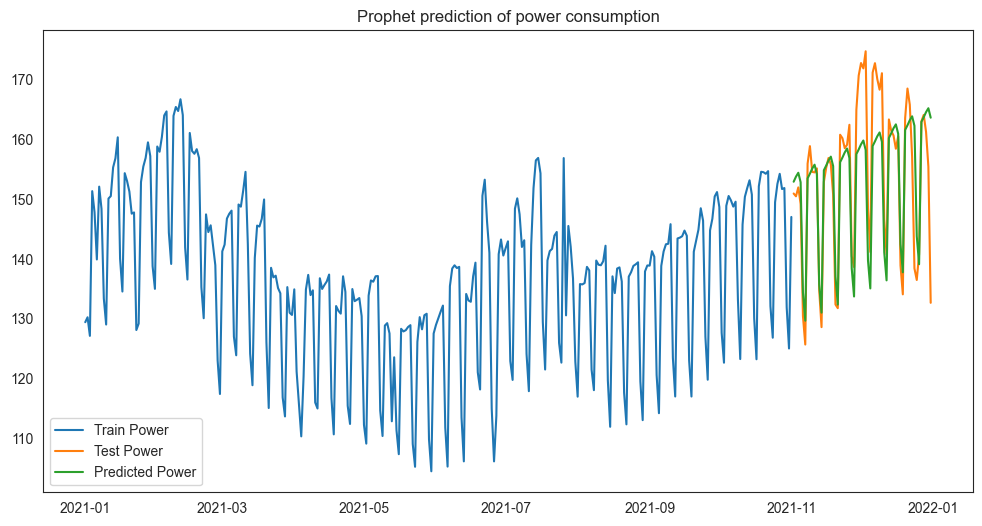

In [49]:
future_dates = y_test.reset_index()[['DateTime']]
future_dates.columns = ['ds']

y_pred = forecaster.predict(future_dates)

# Extract predictions
predictions = y_pred['yhat'][-len(y_test):]

# Create plot
plt.figure(figsize=(12, 6))
plt.plot(y_train.index, y_train.values[:, 0], label='Train Power')
plt.plot(y_test.index, y_test.values[:, 0], label='Test Power')
plt.plot(y_test.index, predictions.values, label='Predicted Power')
plt.legend(loc='best')
plt.title('Prophet prediction of power consumption')
plt.show()

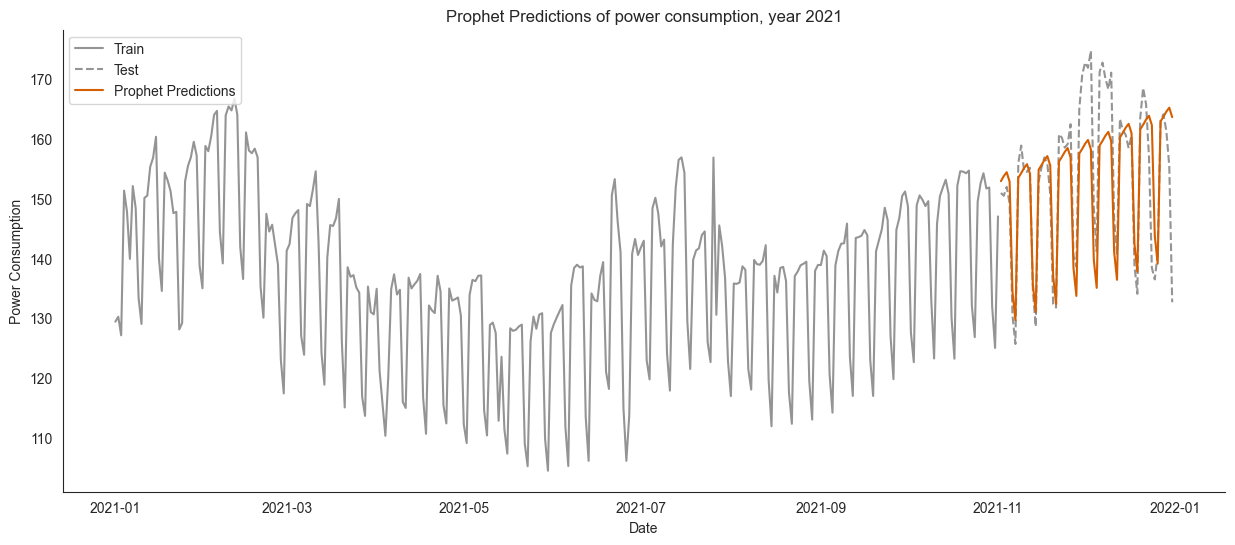

In [50]:
# Initialize Seaborn plot design
sns.set_style("white")

# Create new figure and axis
fig, ax = plt.subplots(figsize=(15, 6))

# Convert your data into pandas series if they are not already
y_train_pd = pd.Series(y_train.values[:, 0], index=y_train.index)
y_test_pd = pd.Series(y_test.values[:, 0], index=y_test.index)
predictions_pd = pd.Series(predictions.values, index=y_test.index)

# "Husl" palette
palette = sns.color_palette('colorblind')

# Plot the training data 
sns.lineplot(x=y_train_pd.index, y=y_train_pd, label='Train', ax=ax, color=palette[7])

# Plot the testing data 
sns.lineplot(x=y_test_pd.index, y=y_test_pd, label='Test', ax=ax, color=palette[7], linestyle="--")

# Plot the SARIMA predictions
sns.lineplot(x=predictions_pd.index, y=predictions_pd, label='Prophet Predictions', ax=ax, color=palette[3])

# Turn off the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Setting plot title and labels
ax.set_title('Prophet Predictions of power consumption, year ' + year)
ax.set_xlabel('Date')
ax.set_ylabel('Power Consumption')

# Setting legend
ax.legend(loc='upper left')

# Save the figure
#plt.savefig('figures/Prophet_predictions_'+ year +'.pdf')
# Display the plot
plt.show()

In [51]:
# Calculate predictions
predictions = y_pred['yhat']
print(len(predictions))
# Calculate actual values
actual = y_test['Power_Consumption'].values
print(len(actual))

# Calculate MSE
mse= mean_squared_error(actual, predictions)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual, predictions))

# Calculate MAE
mae = mean_absolute_error(actual, predictions)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(actual, predictions)



print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}")


60
60
MSE: 60.9873206536906
RMSE: 7.809437921751514
MAE: 5.333994867999023
MAPE: 3.4777412381590254


Prophet (include price and temperature, seasonality off)

In [52]:
forecaster = Prophet(daily_seasonality=False, weekly_seasonality=False, yearly_seasonality=False)

# Add Sweden's holidays
#forecaster.add_country_holidays(country_name="SE")

# Add 'Price' as a regressor
forecaster.add_regressor('Price')
forecaster.add_regressor('Dew Point Temperature_P39')
df_prophet = y_train.reset_index().rename(columns={'DateTime':'ds', 'Power_Consumption':'y'})

# Fill NaNs in 'Price' column of df_prophet
df_prophet['Price'] = df_prophet['Price'].fillna(0)

print(df_prophet['Price'].isna().sum())

forecaster.fit(df_prophet)

# Finally, when making predictions, you should also provide the 'Price' values for the respective dates
df_prophet_future = y_test.reset_index().rename(columns={'DateTime':'ds', 'Power_Consumption':'y'})
# Fill NaNs in 'Price' column of df_prophet
df_prophet_future['Price'] = df_prophet_future['Price'].fillna(0)
print(df_prophet_future['Price'].isna().sum())

21:31:12 - cmdstanpy - INFO - Chain [1] start processing


21:31:12 - cmdstanpy - INFO - Chain [1] done processing


0
0


In [53]:
# Create future dates and attach future 'Price' values
future_dates = y_test.reset_index()[['DateTime', 'Price','Dew Point Temperature_P39']]
future_dates.columns = ['ds', 'Price','Dew Point Temperature_P39']
future_dates['Price'] = df_prophet_future['Price']
future_dates['Price'] = future_dates['Price'].fillna(0)
future_dates['Dew Point Temperature_P39'] = df_prophet_future['Dew Point Temperature_P39']
future_dates['Dew Point Temperature_P39'] = future_dates['Dew Point Temperature_P39'].fillna(0)
y_pred = forecaster.predict(future_dates)

# Extract predictions
predictions = y_pred['yhat'][-len(y_test):]

Text(0.5, 1.0, 'Prophet with price and temperature')

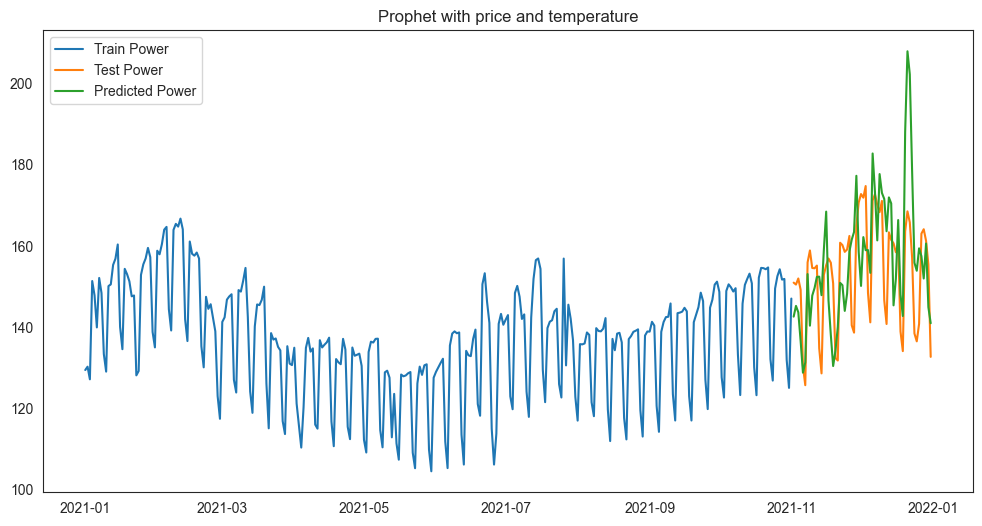

In [54]:
# Create plot
plt.figure(figsize=(12, 6))
plt.plot(y_train.index, y_train.values[:, 0], label='Train Power')
plt.plot(y_test.index, y_test.values[:, 0], label='Test Power')
plt.plot(y_test.index, predictions.values, label='Predicted Power')

plt.legend(loc='upper left')

# Create second y-axis for the prices

plt.title('Prophet with price and temperature')
# Plot prices on second y-axis
#plt.twinx()
#plt.plot(y_train.index, df_prophet['Dew Point Temperature_P39'], color='r', label='Temp C')
#plt.plot(y_test.index, df_prophet_future['Dew Point Temperature_P39'], color='r', label='Temp C')

#plt.legend(loc='upper right')

#plt.show()

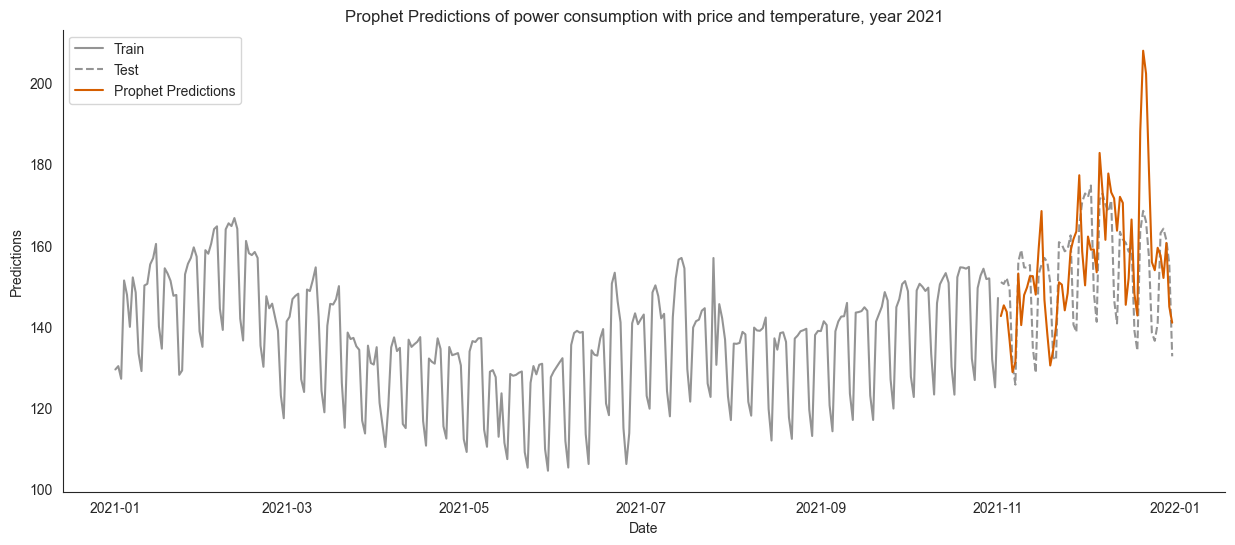

In [55]:
# Initialize Seaborn plot design
sns.set_style("white")

# Create new figure and axis
fig, ax = plt.subplots(figsize=(15, 6))

# Convert your data into pandas series if they are not already
y_train_pd = pd.Series(y_train.values[:, 0], index=y_train.index)
y_test_pd = pd.Series(y_test.values[:, 0], index=y_test.index)
predictions_pd = pd.Series(predictions.values, index=y_test.index)

# "Husl" palette
palette = sns.color_palette('colorblind')

# Plot the training data 
sns.lineplot(x=y_train_pd.index, y=y_train_pd, label='Train', ax=ax, color=palette[7])

# Plot the testing data 
sns.lineplot(x=y_test_pd.index, y=y_test_pd, label='Test', ax=ax, color=palette[7], linestyle="--")

# Plot the SARIMA predictions
sns.lineplot(x=predictions_pd.index, y=predictions_pd, label='Prophet Predictions', ax=ax, color=palette[3])

# Turn off the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Setting plot title and labels
ax.set_title('Prophet Predictions of power consumption with price and temperature, year ' + year)
ax.set_xlabel('Date')
ax.set_ylabel('Predictions')

# Setting legend
ax.legend(loc='upper left')

# Save the figure
#plt.savefig('figures/Prophet_predictions_'+ year +'.pdf')
# Display the plot
plt.show()

In [57]:
# Calculate predictions
predictions = y_pred['yhat']
print(len(predictions))
# Calculate actual values
actual = y_test['Power_Consumption'].values
print(len(actual))

# Calculate MSE
mse= mean_squared_error(actual, predictions)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual, predictions))

# Calculate MAE
mae = mean_absolute_error(actual, predictions)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(actual, predictions)



print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}")

60
60
MSE: 215.63846079103692
RMSE: 14.684633491886576
MAE: 12.306686178200032
MAPE: 8.054144765597423


Prophet (include price, temperature, daily and weekly seasonality)

In [58]:
forecaster = Prophet(daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=True)

# Add Sweden's holidays
forecaster.add_country_holidays(country_name="SE")

# Add 'Price' as a regressor
forecaster.add_regressor('Price')
forecaster.add_regressor('Dew Point Temperature_P39')
df_prophet = y_train.reset_index().rename(columns={'DateTime':'ds', 'Power_Consumption':'y'})

# Fill NaNs in 'Price' column of df_prophet
df_prophet['Price'] = df_prophet['Price'].fillna(0)

print(df_prophet['Price'].isna().sum())

forecaster.fit(df_prophet)

# Finally, when making predictions, you should also provide the 'Price' values for the respective dates
df_prophet_future = y_test.reset_index().rename(columns={'DateTime':'ds', 'Power_Consumption':'y'})
# Fill NaNs in 'Price' column of df_prophet
df_prophet_future['Price'] = df_prophet_future['Price'].fillna(0)
print(df_prophet_future['Price'].isna().sum())

21:35:52 - cmdstanpy - INFO - Chain [1] start processing
21:35:52 - cmdstanpy - INFO - Chain [1] done processing


0
0


In [59]:
# Create future dates and attach future 'Price' values
future_dates = y_test.reset_index()[['DateTime', 'Price','Dew Point Temperature_P39']]
future_dates.columns = ['ds', 'Price','Dew Point Temperature_P39']
future_dates['Price'] = df_prophet_future['Price']
future_dates['Price'] = future_dates['Price'].fillna(0)
future_dates['Dew Point Temperature_P39'] = df_prophet_future['Dew Point Temperature_P39']
future_dates['Dew Point Temperature_P39'] = future_dates['Dew Point Temperature_P39'].fillna(0)
y_pred = forecaster.predict(future_dates)

# Extract predictions
predictions = y_pred['yhat'][-len(y_test):]

Text(0.5, 1.0, 'Prophet with price, seasonality and temperature')

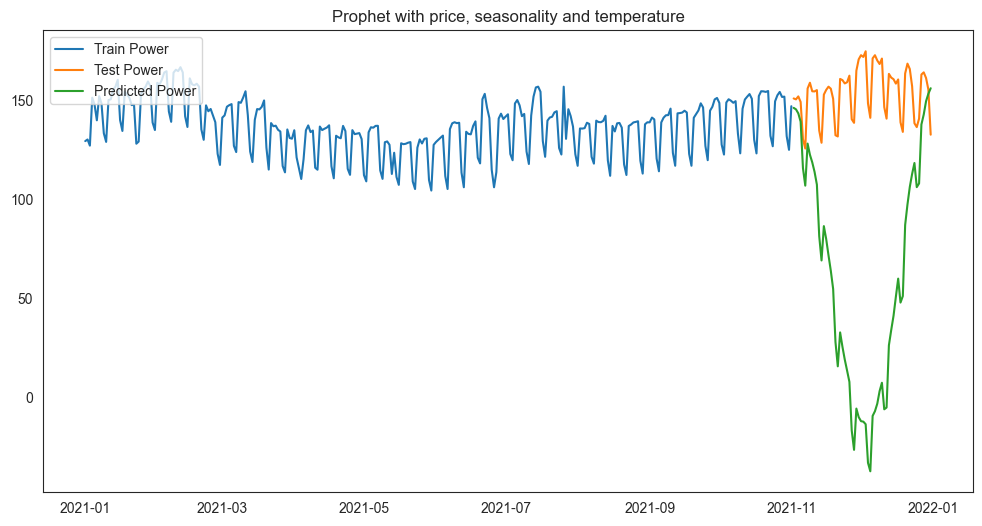

In [60]:
# Create plot
plt.figure(figsize=(12, 6))
plt.plot(y_train.index, y_train.values[:, 0], label='Train Power')
plt.plot(y_test.index, y_test.values[:, 0], label='Test Power')
plt.plot(y_test.index, predictions.values, label='Predicted Power')

plt.legend(loc='upper left')

# Create second y-axis for the prices

plt.title('Prophet with price, seasonality and temperature')
# Plot prices on second y-axis
#plt.twinx()
#plt.plot(y_train.index, df_prophet['Dew Point Temperature_P39'], color='r', label='Temp C')
#plt.plot(y_test.index, df_prophet_future['Dew Point Temperature_P39'], color='r', label='Temp C')

#plt.legend(loc='upper right')

#plt.show()

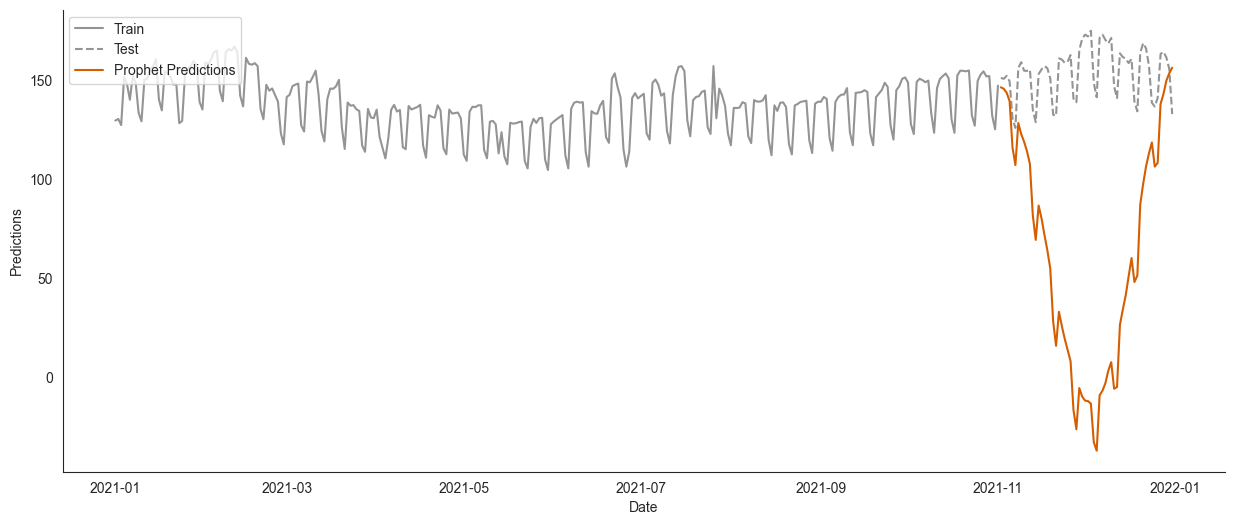

In [61]:
# Initialize Seaborn plot design
sns.set_style("white")

# Create new figure and axis
fig, ax = plt.subplots(figsize=(15, 6))

# Convert your data into pandas series if they are not already
y_train_pd = pd.Series(y_train.values[:, 0], index=y_train.index)
y_test_pd = pd.Series(y_test.values[:, 0], index=y_test.index)
predictions_pd = pd.Series(predictions.values, index=y_test.index)

# "Husl" palette
palette = sns.color_palette('colorblind')

# Plot the training data 
sns.lineplot(x=y_train_pd.index, y=y_train_pd, label='Train', ax=ax, color=palette[7])

# Plot the testing data 
sns.lineplot(x=y_test_pd.index, y=y_test_pd, label='Test', ax=ax, color=palette[7], linestyle="--")

# Plot the SARIMA predictions
sns.lineplot(x=predictions_pd.index, y=predictions_pd, label='Prophet Predictions', ax=ax, color=palette[3])

# Turn off the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Setting plot title and labels
#ax.set_title('Prophet Predictions')
ax.set_xlabel('Date')
ax.set_ylabel('Predictions')

# Setting legend
ax.legend(loc='upper left')

# Save the figure
#plt.savefig('figures/Prophet_predictions_'+ year +'.pdf')
# Display the plot
plt.show()

In [62]:
# Calculate predictions
predictions = y_pred['yhat']
print(len(predictions))
# Calculate actual values
actual = y_test['Power_Consumption'].values
print(len(actual))

# Calculate MSE
mse= mean_squared_error(actual, predictions)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual, predictions))

# Calculate MAE
mae = mean_absolute_error(actual, predictions)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(actual, predictions)



print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}")

60
60
MSE: 12580.073141261693
RMSE: 112.16092519795694
MAE: 93.9157722811481
MAPE: 60.192338324956395


Prophet (include temperature and daily and weekly seasonality)

In [63]:
forecaster = Prophet(daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=True)

# Add Sweden's holidays
forecaster.add_country_holidays(country_name="SE")
forecaster.add_regressor('Dew Point Temperature_P39')
df_prophet = y_train.reset_index().rename(columns={'DateTime':'ds', 'Power_Consumption':'y'})

forecaster.fit(df_prophet)
df_prophet_future = y_test.reset_index().rename(columns={'DateTime':'ds', 'Power_Consumption':'y'})

21:36:17 - cmdstanpy - INFO - Chain [1] start processing
21:36:17 - cmdstanpy - INFO - Chain [1] done processing


In [64]:
# Create future dates and attach future 'Dew Point Temperature_P39' values
future_dates = y_test.reset_index()[['DateTime', 'Dew Point Temperature_P39']]
future_dates.columns = ['ds', 'Dew Point Temperature_P39']
future_dates
future_dates['Dew Point Temperature_P39'] = df_prophet_future['Dew Point Temperature_P39']
future_dates['Dew Point Temperature_P39'] = future_dates['Dew Point Temperature_P39'].fillna(0)
y_pred = forecaster.predict(future_dates)

# Extract predictions
predictions = y_pred['yhat'][-len(y_test):]

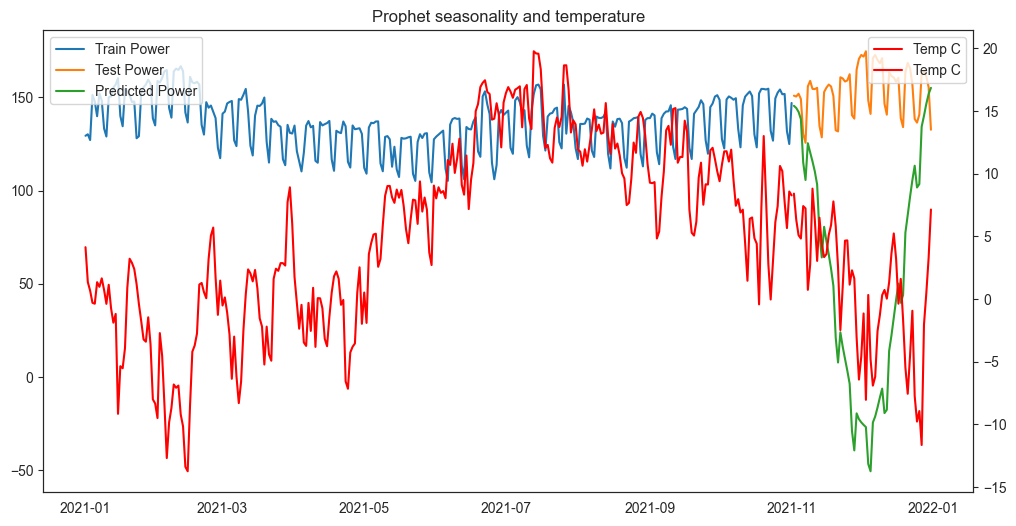

In [65]:
# Create plot
plt.figure(figsize=(12, 6))
plt.plot(y_train.index, y_train.values[:, 0], label='Train Power')
plt.plot(y_test.index, y_test.values[:, 0], label='Test Power')
plt.plot(y_test.index, predictions.values, label='Predicted Power')

plt.legend(loc='upper left')

# Create second y-axis for the prices

plt.title('Prophet seasonality and temperature')
# Plot prices on second y-axis
plt.twinx()
plt.plot(y_train.index, df_prophet['Dew Point Temperature_P39'], color='r', label='Temp C')
plt.plot(y_test.index, df_prophet_future['Dew Point Temperature_P39'], color='r', label='Temp C')

plt.legend(loc='upper right')

plt.show()

In [66]:
from sklearn.metrics import mean_absolute_error

# Calculate predictions
predictions = y_pred['yhat']
print(len(predictions))
# Calculate actual values
actual = y_test['Power_Consumption'].values
print(len(actual))

# Calculate MSE
mse= mean_squared_error(actual, predictions)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual, predictions))

# Calculate MAE
mae = mean_absolute_error(actual, predictions)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(actual, predictions)



print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}")

60
60
MSE: 14653.74367943085
RMSE: 121.05264837842603
MAE: 101.72605569378173
MAPE: 65.19416560691998
